<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/21_randomForest_and_nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###データの読み込み

In [0]:
import numpy
from pandas import DataFrame
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [0]:
boston = load_boston()
X = boston.data  # 特徴量
y = boston.target  # 目的変数
feature_names = boston.feature_names  # 特徴量名

df = DataFrame(data=X, columns=feature_names)
df['MEDV'] = y  # 目的変数

In [0]:
X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
X_train0 = X_train[:, 0].reshape(-1, 1)  # 訓練データのRM
X_train1 = X_train[:, 1].reshape(-1, 1)  # 訓練データのLSTAT
X_test0 = X_test[:, 0].reshape(-1, 1)  # テストデータのRM
X_test1 = X_test[:, 1].reshape(-1, 1)  # テストデータのLSTAT

### RM

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf0 = RandomForestRegressor(criterion='mse', random_state=42)

In [8]:
rf0.fit(X_train0, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [9]:
rf0.score(X_train0, y_train)

0.8500949744417928

In [10]:
rf0.score(X_test0, y_test)

0.3682723129466367

In [0]:
from matplotlib import pyplot
pyplot.rcParams['font.family'] = 'IPAPGothic'

In [0]:
y_pred = rf0.predict(X_test0)

In [0]:
idx = numpy.argsort(X_test0[:, 0])

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['IPAPGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


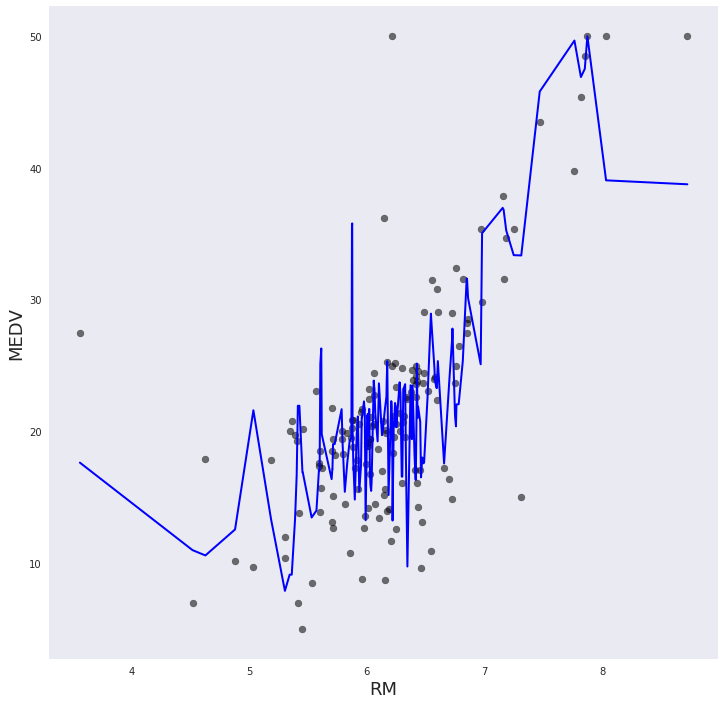

In [15]:
fig = pyplot.figure(figsize=(12, 12))

# テストデータのプロット（散布図）
pyplot.scatter(X_test0, y_test, color='black', alpha=0.55)

# 予測値のプロット（直線）
# このとき、データを RM の昇順にプロットする！
pyplot.plot(X_test0[:, 0][idx], y_pred[idx], linewidth=2, color='blue')

pyplot.xlabel("RM", fontsize=18)
pyplot.ylabel("MEDV", fontsize=18)

pyplot.grid()
pyplot.show()

### LSTAT

In [0]:
rf1 = RandomForestRegressor(criterion='mse', random_state=42)

In [17]:
rf1.fit(X_train1, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [18]:
rf1.score(X_train1, y_train)

0.9007108344252717

In [19]:
rf1.score(X_test1, y_test)

0.4590325068821557

In [0]:
y_pred = rf1.predict(X_test1)

In [0]:
idx = numpy.argsort(X_test1[:, 0])

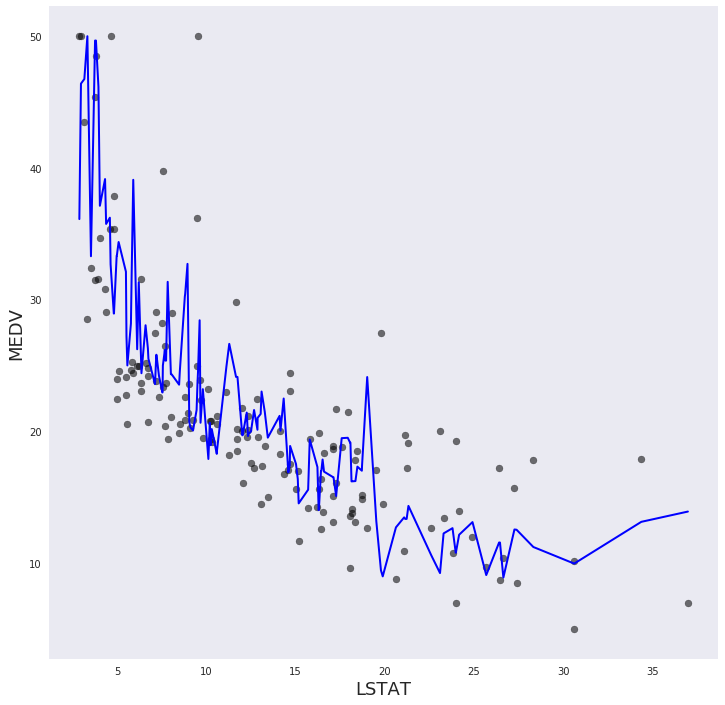

In [22]:
fig = pyplot.figure(figsize=(12, 12))

# テストデータのプロット（散布図）
pyplot.scatter(X_test1, y_test, color='black', alpha=0.55)

# 予測値のプロット（直線）
# このとき、データを LSTAT の昇順にプロットする！
pyplot.plot(X_test1[:, 0][idx], y_pred[idx], linewidth=2, color='blue')

pyplot.xlabel("LSTAT", fontsize=18)
pyplot.ylabel("MEDV", fontsize=18)

pyplot.grid()
pyplot.show()

### RM&LSTAT

In [0]:
rf = RandomForestRegressor(criterion='mse', random_state=42)

In [24]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [25]:
rf.score(X_train, y_train)

0.9453894964814328

In [26]:
rf.score(X_test, y_test)

0.6975550710517615